# • PROJECT OBJECTIVE: To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.

In [146]:
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# 1. Data Understanding & Exploration: 

1.A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable

In [147]:
d1= pd.read_csv("C:\\Users\\HARITHA\\Car name.csv")

In [148]:
d1.head()

car_name
0  chevrolet chevelle malibu
1          buick skylark 320
2         plymouth satellite
3              amc rebel sst
4                ford torino

1.B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable. [

In [149]:
d2 = pd.read_json("Car-Attributes.json")

In [150]:
d2.head()

mpg  cyl   disp   hp    wt   acc  yr  origin
0  18.0    8  307.0  130  3504  12.0  70       1
1  15.0    8  350.0  165  3693  11.5  70       1
2  18.0    8  318.0  150  3436  11.0  70       1
3  16.0    8  304.0  150  3433  12.0  70       1
4  17.0    8  302.0  140  3449  10.5  70       1

1.C. Merge both the DataFrames together to form a single DataFrame 

In [151]:
df=d1.join(d2)

In [152]:
df.head()

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1

In [153]:
df.shape

(398, 9)

1.D. Print 5 point summary of the numerical features and share insights. 

In [154]:
df.describe().T

count         mean         std     min       25%     50%       75%  \
mpg     398.0    23.514573    7.815984     9.0    17.500    23.0    29.000   
cyl     398.0     5.454774    1.701004     3.0     4.000     4.0     8.000   
disp    398.0   193.425879  104.269838    68.0   104.250   148.5   262.000   
wt      398.0  2970.424623  846.841774  1613.0  2223.750  2803.5  3608.000   
acc     398.0    15.568090    2.757689     8.0    13.825    15.5    17.175   
yr      398.0    76.010050    3.697627    70.0    73.000    76.0    79.000   
origin  398.0     1.572864    0.802055     1.0     1.000     1.0     2.000   

           max  
mpg       46.6  
cyl        8.0  
disp     455.0  
wt      5140.0  
acc       24.8  
yr        82.0  
origin     3.0

 - insights: 

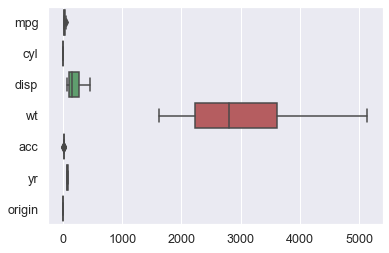

In [155]:
sns.boxplot(df,orient='h');

# 2. Data Preparation & Analysis:

2.A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach. 

In [156]:
percent_missing = df.isnull().sum() * 100 / len(df)

In [157]:
percent_missing 

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

In [158]:
 df.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

2.B. Check for duplicate values in the data and impute with the best suitable approach

In [159]:
df.duplicated().sum()

0

2.C. Plot a pairplot for all features. 

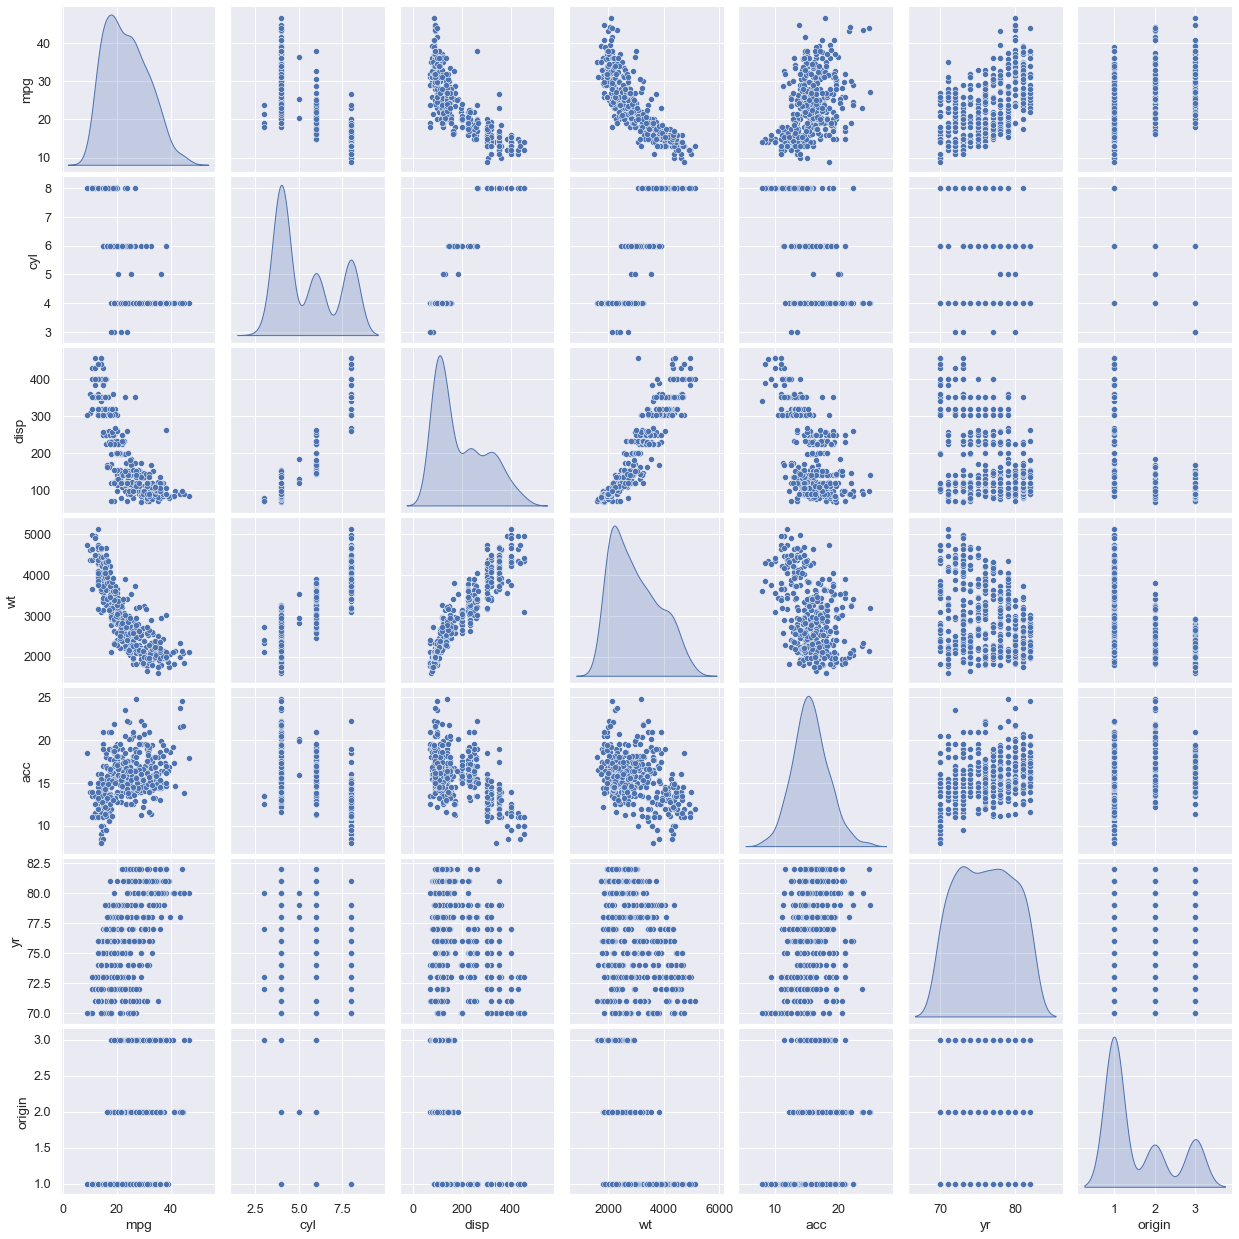

In [160]:
sns.pairplot(df,diag_kind='kde');

2.D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.

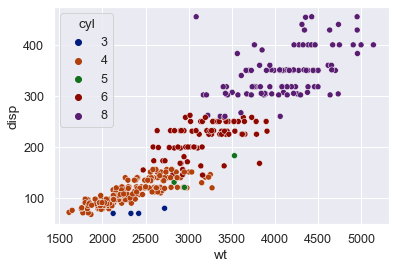

In [161]:
sns.scatterplot(data=df,x='wt',y='disp',hue='cyl',palette='dark');

2.E. Share insights for Q2.d

- if the wt increases the disp increases.

2.F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’

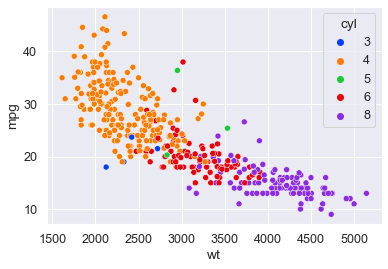

In [162]:
sns.scatterplot(data=df,x='wt',y='mpg',hue='cyl',palette='bright');

2.G. Share insights for Q2.f

- when the wt increases mpg gets decreased, if the wt is low the mpg will be high

2.H. Check for unexpected values in all the features and datapoints with such values.

In [163]:
df['hp'].sample(25)

141     83
139    140
283     90
255     88
146     75
233     78
55      60
363    110
108     88
371     84
163     95
23     113
67     208
355     75
0      130
160    110
241     97
48      88
218     58
367     88
351     65
185     79
162    110
213    145
83      80
Name: hp, dtype: object

In [164]:
df[df['hp']=="?"]

car_name   mpg  cyl   disp hp    wt   acc  yr  origin
32             ford pinto  25.0    4   98.0  ?  2046  19.0  71       1
126         ford maverick  21.0    6  200.0  ?  2875  17.0  74       1
330  renault lecar deluxe  40.9    4   85.0  ?  1835  17.3  80       2
336    ford mustang cobra  23.6    4  140.0  ?  2905  14.3  80       1
354           renault 18i  34.5    4  100.0  ?  2320  15.8  81       2
374        amc concord dl  23.0    4  151.0  ?  3035  20.5  82       1

In [165]:
df['hp'].replace("?",np.nan, inplace=True)

In [166]:
df['hp'].iloc[336]

nan

In [167]:
df['hp'].dropna(inplace=True)

In [168]:
df['hp'].iloc[336]

92.0

In [169]:
df.shape

(398, 9)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        392 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [171]:
df['hp'].fillna((df['hp'].median()), inplace=True)
df['hp'] = df['hp'].astype('float')

In [172]:
df.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [173]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [174]:
# Creating an object for the StandardScaler function
X = StandardScaler()

In [175]:
scaled_df = X.fit_transform(df.iloc[:,1:9])

In [176]:
scaled_df

array([[-0.7064387 ,  1.49819126,  1.0906037 , ..., -1.29549834,
        -1.62742629, -0.71514478],
       [-1.09075062,  1.49819126,  1.5035143 , ..., -1.47703779,
        -1.62742629, -0.71514478],
       [-0.7064387 ,  1.49819126,  1.19623199, ..., -1.65857724,
        -1.62742629, -0.71514478],
       ...,
       [ 1.08701694, -0.85632057, -0.56103873, ..., -1.4407299 ,
         1.62198339, -0.71514478],
       [ 0.57460104, -0.85632057, -0.70507731, ...,  1.10082237,
         1.62198339, -0.71514478],
       [ 0.95891297, -0.85632057, -0.71467988, ...,  1.39128549,
         1.62198339, -0.71514478]])

# 3. Clustering:

3.A. Apply K-Means clustering for 2 to 10 clusters. 

In [177]:
df.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [178]:
df.dropna(inplace=True)

In [179]:
df.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [180]:
df.groupby(df['cyl']).mean()

mpg        disp          hp           wt        acc         yr  \
cyl                                                                         
3    20.550000   72.500000   99.250000  2398.500000  13.250000  75.500000   
4    29.286765  109.796569   78.654412  2308.127451  16.601471  77.073529   
5    27.366667  145.000000   82.333333  3103.333333  18.633333  79.000000   
6    19.985714  218.142857  101.410714  3198.226190  16.263095  75.928571   
8    14.963107  345.009709  158.300971  4114.718447  12.955340  73.902913   

       origin  
cyl            
3    3.000000  
4    1.985294  
5    2.000000  
6    1.190476  
8    1.000000

In [181]:
# Calculate age of vehicle
df['age'] = 83-df['yr']
df.head()

car_name   mpg  cyl   disp     hp    wt   acc  yr  origin  \
0  chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1   
1          buick skylark 320  15.0    8  350.0  165.0  3693  11.5  70       1   
2         plymouth satellite  18.0    8  318.0  150.0  3436  11.0  70       1   
3              amc rebel sst  16.0    8  304.0  150.0  3433  12.0  70       1   
4                ford torino  17.0    8  302.0  140.0  3449  10.5  70       1   

   age  
0   13  
1   13  
2   13  
3   13  
4   13

In [182]:
#Convert origing into dummy variables (This again is subjected to business knowledge. We might drop this variable as well
# Inclusion is more to demonstrate on how to use categorical data)

one_hot = pd.get_dummies(df['origin'])
one_hot = one_hot.add_prefix('origin_')

# merge in main data frame
df = df.join(one_hot)
df.head()

car_name   mpg  cyl   disp     hp    wt   acc  yr  origin  \
0  chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1   
1          buick skylark 320  15.0    8  350.0  165.0  3693  11.5  70       1   
2         plymouth satellite  18.0    8  318.0  150.0  3436  11.0  70       1   
3              amc rebel sst  16.0    8  304.0  150.0  3433  12.0  70       1   
4                ford torino  17.0    8  302.0  140.0  3449  10.5  70       1   

   age  origin_1  origin_2  origin_3  
0   13         1         0         0  
1   13         1         0         0  
2   13         1         0         0  
3   13         1         0         0  
4   13         1         0         0

In [183]:
df_new = df.drop(['yr','origin','car_name'], axis =1)
df_new.head()

mpg  cyl   disp     hp    wt   acc  age  origin_1  origin_2  origin_3
0  18.0    8  307.0  130.0  3504  12.0   13         1         0         0
1  15.0    8  350.0  165.0  3693  11.5   13         1         0         0
2  18.0    8  318.0  150.0  3436  11.0   13         1         0         0
3  16.0    8  304.0  150.0  3433  12.0   13         1         0         0
4  17.0    8  302.0  140.0  3449  10.5   13         1         0         0

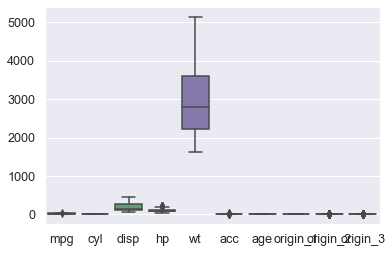

In [184]:
sns.boxplot(data=df_new);

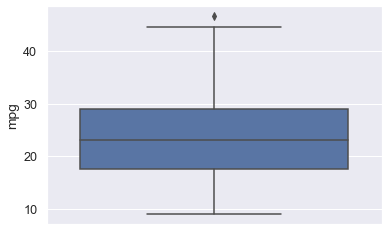

In [185]:
# We could see some outliers for mpg,hp and acc
sns.boxplot(y=df_new['mpg']);

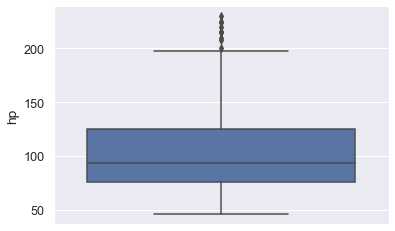

In [186]:
sns.boxplot(y=df_new['hp']);

In [187]:
df_new['hp'] = np.log(df_new['hp'])
df_new['acc'] = np.log(df_new['acc'])
df_new['mpg'] = np.log(df_new['mpg'])
df_new.head()

mpg  cyl   disp        hp    wt       acc  age  origin_1  origin_2  \
0  2.890372    8  307.0  4.867534  3504  2.484907   13         1         0   
1  2.708050    8  350.0  5.105945  3693  2.442347   13         1         0   
2  2.890372    8  318.0  5.010635  3436  2.397895   13         1         0   
3  2.772589    8  304.0  5.010635  3433  2.484907   13         1         0   
4  2.833213    8  302.0  4.941642  3449  2.351375   13         1         0   

   origin_3  
0         0  
1         0  
2         0  
3         0  
4         0

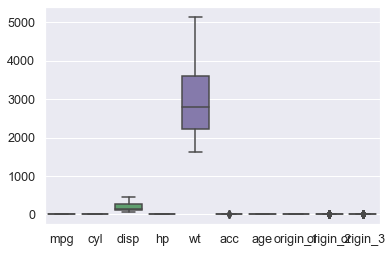

In [188]:
sns.boxplot(data=df_new);

In [189]:
from scipy.stats import zscore
df_new.dtypes
numeric_cols = df_new.select_dtypes(include=[np.int64, np.float64]).columns
numeric_cols
df_new[numeric_cols] =df_new[numeric_cols].apply(zscore)

In [190]:
df_new.head()

mpg       cyl      disp        hp        wt       acc       age  \
0 -0.622035  1.498191  1.090604  0.823608  0.630870 -1.353748  1.627426   
1 -1.159493  1.498191  1.503514  1.523992  0.854333 -1.589535  1.627426   
2 -0.622035  1.498191  1.196232  1.243998  0.550470 -1.835805  1.627426   
3 -0.969242  1.498191  1.061796  1.243998  0.546923 -1.353748  1.627426   
4 -0.790530  1.498191  1.042591  1.041316  0.565841 -2.093533  1.627426   

   origin_1  origin_2  origin_3  
0         1         0         0  
1         1         0         0  
2         1         0         0  
3         1         0         0  
4         1         0         0

In [191]:
cluster_range = range(2,11)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(df_new)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df

num_clusters  cluster_errors
0             2     1435.661694
1             3     1072.434353
2             4      873.977856
3             5      786.882347
4             6      719.246694
5             7      669.071352
6             8      626.382044
7             9      592.177064
8            10      562.011930

3.B. Plot a visual and find elbow point

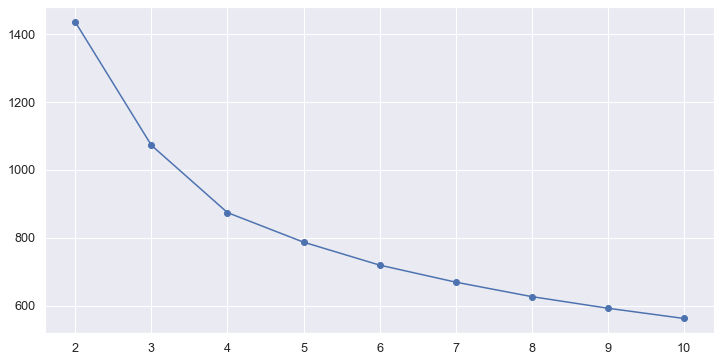

In [192]:
from matplotlib import cm

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

3.C. On the above visual, highlight which are the possible Elbow points

- Based on the above visual the possible elbow points would be 3,4,5

3.D. Train a K-means clustering model once again on the optimal number of clusters

In [193]:
#Set the value of k=4
kmeans = KMeans(n_clusters=4, n_init = 15, random_state=2345)

In [194]:
kmeans.fit(df_new)

KMeans(n_clusters=4, n_init=15, random_state=2345)

In [195]:
centroids = kmeans.cluster_centers_

In [196]:
centroids

array([[ 3.37373388e-01, -8.68583653e-01, -8.24059183e-01,
        -5.45072859e-01, -7.70282170e-01,  3.08194952e-01,
         6.57116455e-01,  2.50000000e-01,  4.68750000e-01,
         2.81250000e-01],
       [-1.30629972e+00,  1.49819126e+00,  1.50392292e+00,
         1.44265580e+00,  1.40409797e+00, -1.15022628e+00,
         6.88323847e-01,  1.00000000e+00, -2.49800181e-16,
         8.32667268e-17],
       [ 1.08052956e+00, -8.21103514e-01, -7.73033976e-01,
        -7.99132185e-01, -7.48370271e-01,  4.26220045e-01,
        -1.08735830e+00,  4.10256410e-01,  1.88034188e-01,
         4.01709402e-01],
       [-3.95798123e-01,  4.24430369e-01,  3.09735186e-01,
         1.12261708e-01,  3.24408797e-01,  3.15019884e-01,
        -6.20550104e-03,  9.12087912e-01,  3.29670330e-02,
         5.49450549e-02]])

In [197]:
#Calculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(df_new) )

In [198]:
print(centroid_df)

        mpg       cyl      disp        hp        wt       acc       age  \
0  0.337373 -0.868584 -0.824059 -0.545073 -0.770282  0.308195  0.657116   
1 -1.306300  1.498191  1.503923  1.442656  1.404098 -1.150226  0.688324   
2  1.080530 -0.821104 -0.773034 -0.799132 -0.748370  0.426220 -1.087358   
3 -0.395798  0.424430  0.309735  0.112262  0.324409  0.315020 -0.006206   

   origin_1      origin_2      origin_3  
0  0.250000  4.687500e-01  2.812500e-01  
1  1.000000 -2.498002e-16  8.326673e-17  
2  0.410256  1.880342e-01  4.017094e-01  
3  0.912088  3.296703e-02  5.494505e-02  


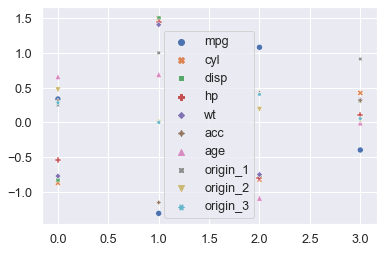

In [199]:
sns.scatterplot(centroid_df,legend='full')

3.E. Add a new feature in the DataFrame which will have labels based upon cluster value. 

In [200]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [201]:
# Joining the label dataframe with the data frame.
df_labeled = df.join(df_labels)

In [202]:
df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(4177)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. 
df_analysis

car_name   mpg  cyl   disp     hp    wt   acc  yr  \
0    chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70   
1            buick skylark 320  15.0    8  350.0  165.0  3693  11.5  70   
2           plymouth satellite  18.0    8  318.0  150.0  3436  11.0  70   
3                amc rebel sst  16.0    8  304.0  150.0  3433  12.0  70   
4                  ford torino  17.0    8  302.0  140.0  3449  10.5  70   
..                         ...   ...  ...    ...    ...   ...   ...  ..   
393            ford mustang gl  27.0    4  140.0   86.0  2790  15.6  82   
394                  vw pickup  44.0    4   97.0   52.0  2130  24.6  82   
395              dodge rampage  32.0    4  135.0   84.0  2295  11.6  82   
396                ford ranger  28.0    4  120.0   79.0  2625  18.6  82   
397                 chevy s-10  31.0    4  119.0   82.0  2720  19.4  82   

     origin  age  origin_1  origin_2  origin_3 labels  
0         1   13         1         0         0      1  
1         1   13         1         0         0      1  
2         1   13         1         0         0      1  
3         1   13         1         0         0      1  
4         1   13         1         0         0      1  
..      ...  ...       ...       ...       ...    ...  
393       1    1         1         0         0      2  
394       2    1         0         1         0      2  
395       1    1         1         0         0      2  
396       1    1         1         0         0      2  
397       1    1         1         0         0      2  

[398 rows x 14 columns]

In [203]:
df_labeled['labels'].value_counts()

2    117
0     96
1     94
3     91
Name: labels, dtype: int64

3.F. Plot a visual and color the datapoints based upon clusters

In [204]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

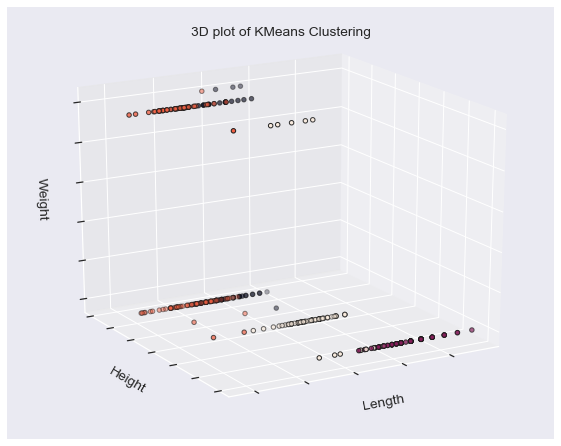

In [205]:
## 3D plots of clusters
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
kmeans.fit(df_new)
labels = kmeans.labels_
ax.scatter(df_new.iloc[:, 0], df_new.iloc[:, 1],df_new.iloc[:,9],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

3.G.Pass a new DataPoint and predict which cluster it belongs to

In [206]:
df_row={'car_name': 'ford torino',
         'mpg': '17.0',
          'cyl': '80',
          'disp': '303.0',
          'hp': '145.0',
          'wt': '3431',
          'acc': '11.5',
          'yr': '80',
          'origin':'1',
          'age': '13',
          'origin_1': '1',
          'origin_2': '0',
          'origin_3':'0'}

In [207]:
df= df.append(df_row,ignore_index=True )

In [208]:
df.shape

(399, 13)

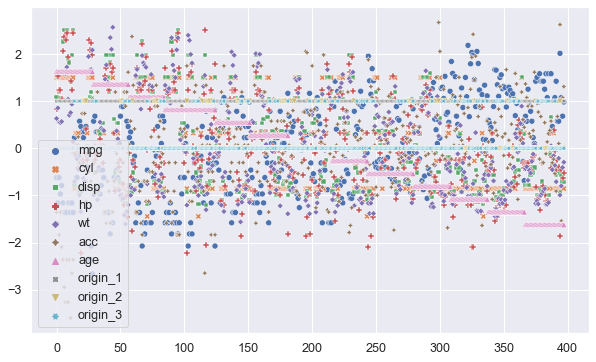

In [297]:
sns.scatterplot(data=df_new,legend='auto');

# PART B :

# 1. Data Understanding & Cleaning:

1.A. Read ‘vehicle.csv’ and save as DataFrame.

In [210]:
#For numerical libraries
import numpy as np
#To handle data in the form of rows and columns
import pandas as pd
#importing seaborn for statistical plots
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing the Encoding library
from sklearn.preprocessing import LabelEncoder
#Build the model with the best hyper parameters
from sklearn.model_selection import cross_val_score
#importing the zscore for scaling
from scipy.stats import zscore
#Importing PCA for dimensionality reduction and visualization
from sklearn.decomposition import PCA
# Import Logistic Regression machine learning library
from sklearn.linear_model import LogisticRegression 
# Import Support Vector Classifier machine learning library
from sklearn.svm import SVC
#Import Naive Bayes' machine learning Library
from sklearn.naive_bayes import GaussianNB
#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
#Grid search to tune model parameters for SVC
from sklearn.model_selection import GridSearchCV
# Import the metrics
from sklearn import metrics

In [211]:
vehicle_df=pd.read_csv('C:\\Users\\HARITHA\\vehicle.csv')

In [212]:
vehicle_df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [213]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

1.B. Check percentage of missing values and impute with correct approach

In [214]:
vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [215]:
percent_missing = vehicle_df.isnull().sum() * 100 / len(df)

In [216]:
percent_missing

compactness                    0.000000
circularity                    1.253133
distance_circularity           1.002506
radius_ratio                   1.503759
pr.axis_aspect_ratio           0.501253
max.length_aspect_ratio        0.000000
scatter_ratio                  0.250627
elongatedness                  0.250627
pr.axis_rectangularity         0.751880
max.length_rectangularity      0.000000
scaled_variance                0.751880
scaled_variance.1              0.501253
scaled_radius_of_gyration      0.501253
scaled_radius_of_gyration.1    1.002506
skewness_about                 1.503759
skewness_about.1               0.250627
skewness_about.2               0.250627
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

In [217]:
#class attribute is not an object it is a category
vehicle_df['class']=vehicle_df['class'].astype('category')

In [218]:
#To get the shape 
vehicle_df.shape

(846, 19)

In [219]:
#To get the number of columns
vehicle_df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [220]:
#Checking for missing values in the dataset
vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [221]:
#replace missing variable('?') into null variable using numpy
vehicle_df = vehicle_df.replace(' ', np.nan)

In [222]:
#Replacing the missing values by median 
for i in vehicle_df.columns[:17]:
    median_value = vehicle_df[i].median()
    vehicle_df[i] = vehicle_df[i].fillna(median_value)

In [223]:
# again check for missing values
vehicle_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [224]:
# Again check data information
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   compactness                  846 non-null    int64   
 1   circularity                  846 non-null    float64 
 2   distance_circularity         846 non-null    float64 
 3   radius_ratio                 846 non-null    float64 
 4   pr.axis_aspect_ratio         846 non-null    float64 
 5   max.length_aspect_ratio      846 non-null    int64   
 6   scatter_ratio                846 non-null    float64 
 7   elongatedness                846 non-null    float64 
 8   pr.axis_rectangularity       846 non-null    float64 
 9   max.length_rectangularity    846 non-null    int64   
 10  scaled_variance              846 non-null    float64 
 11  scaled_variance.1            846 non-null    float64 
 12  scaled_radius_of_gyration    846 non-null    float64 
 13  scale

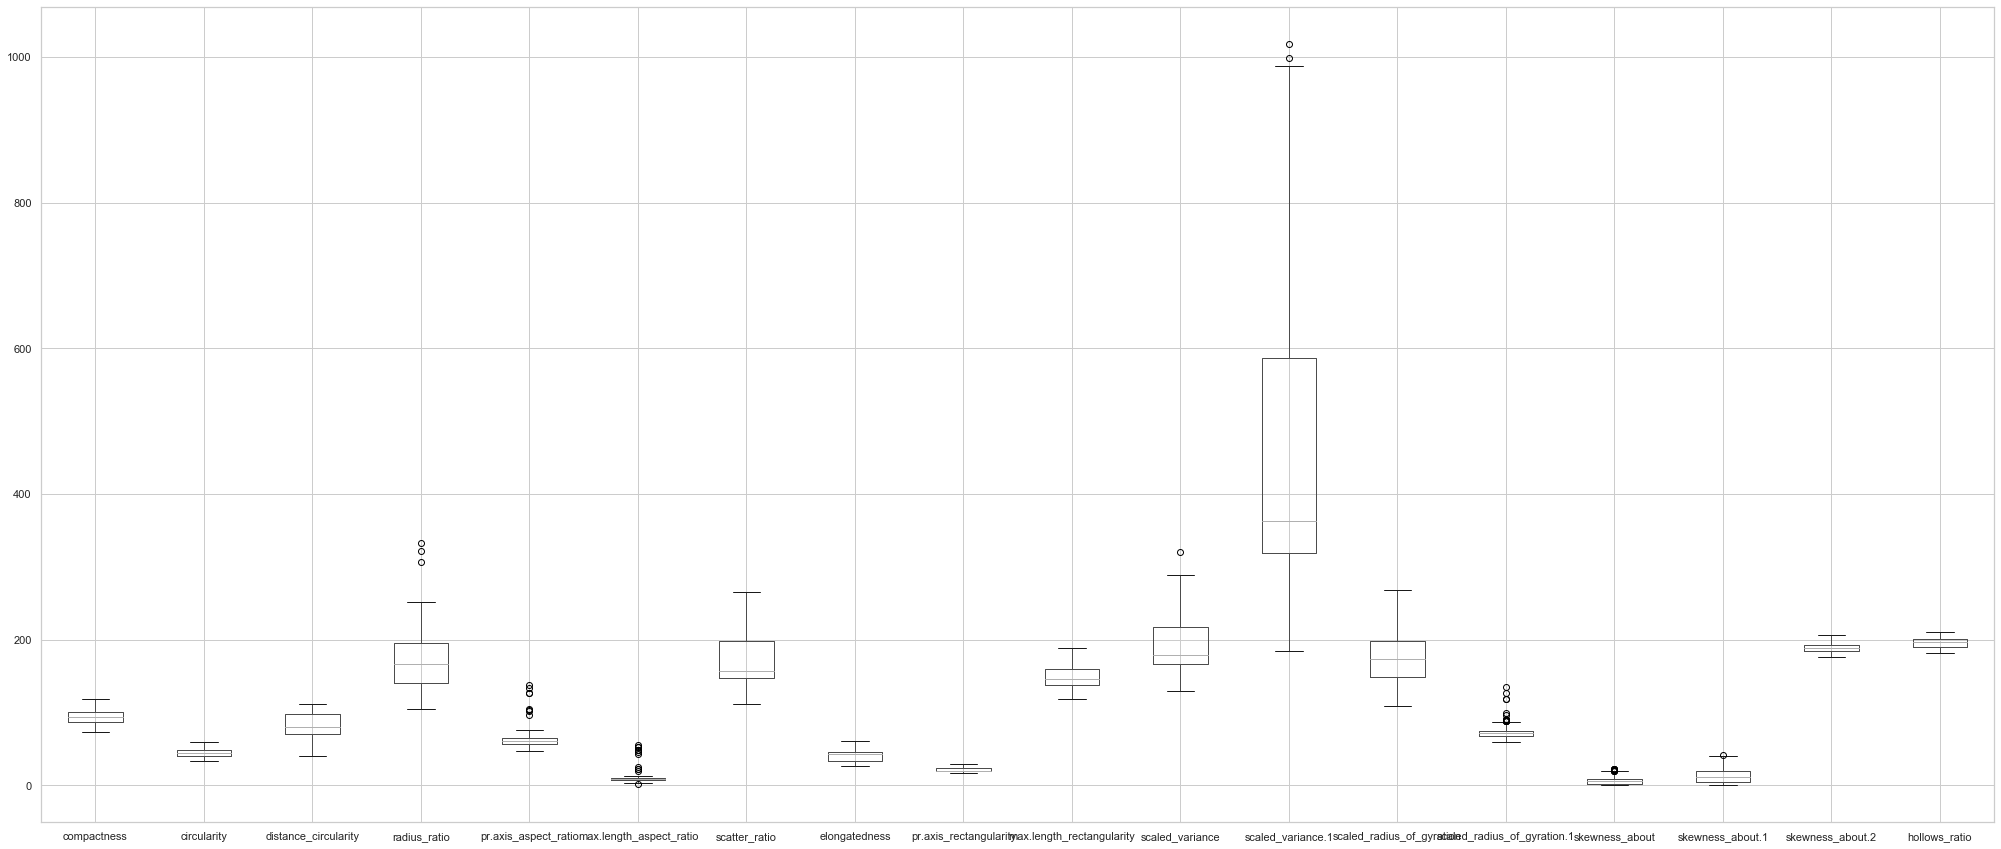

In [225]:
# Understand the spread and outliers in dataset using boxplot
vehicle_df.boxplot(figsize=(35,15));

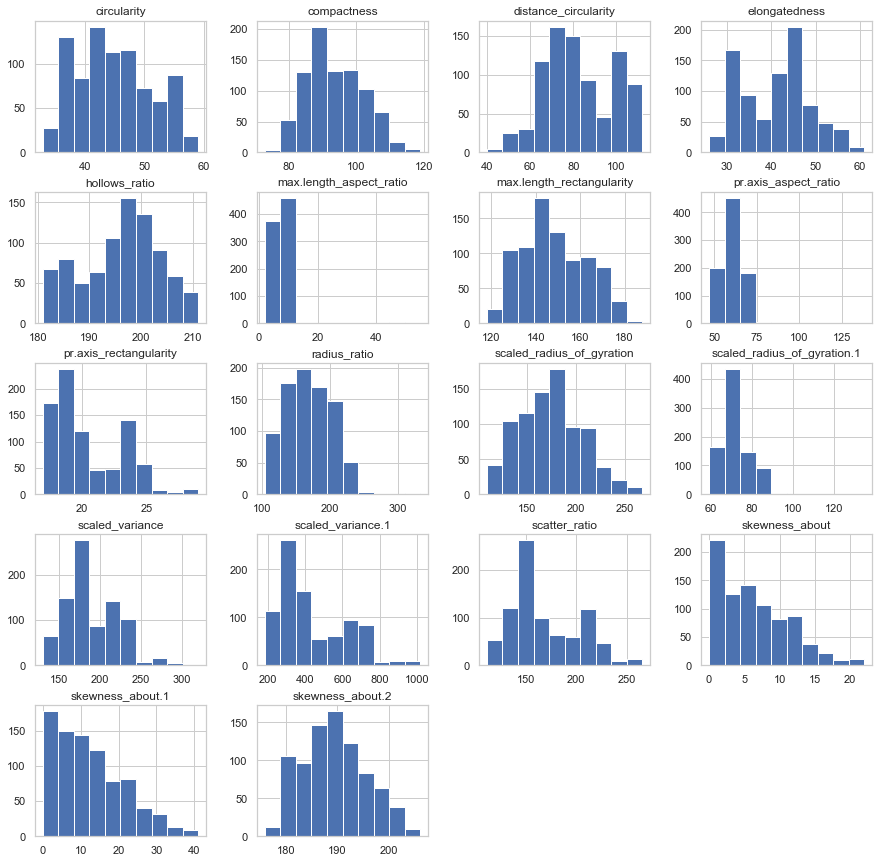

In [226]:
# Histogram 
vehicle_df.hist(figsize=(15,15));

In [227]:
#find the outliers and replace them by median
for col_name in vehicle_df.columns[:-1]:
    q1 = vehicle_df[col_name].quantile(0.25)
    q3 = vehicle_df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    
    vehicle_df.loc[(vehicle_df[col_name] < low) | (vehicle_df[col_name] > high), col_name] = vehicle_df[col_name].median()

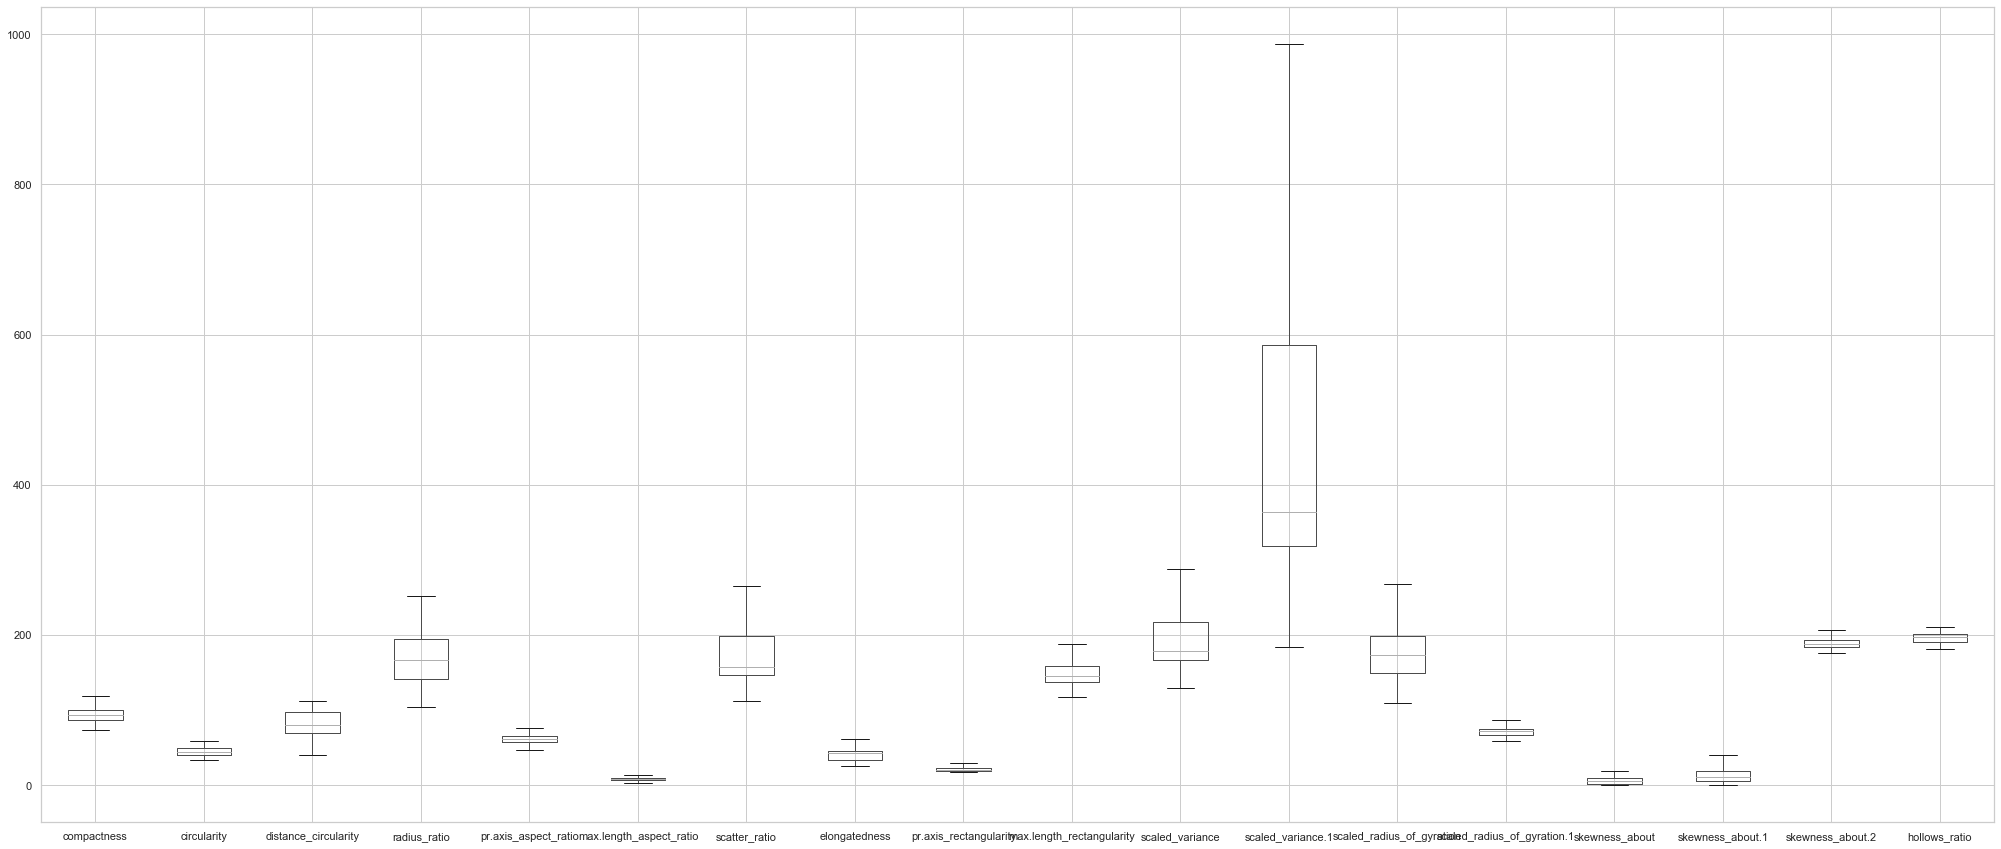

In [228]:
# again check for outliers in dataset using boxplot
vehicle_df.boxplot(figsize=(35,15));

In [229]:
print('Class: \n', vehicle_df['class'].unique())

Class: 
 [van, car, bus]
Categories (3, object): [van, car, bus]


In [230]:
vehicle_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [231]:
#Encoding of categorical variables
labelencoder_X=LabelEncoder()
vehicle_df['class']=labelencoder_X.fit_transform(vehicle_df['class'])

In [232]:
#correlation matrix
cor=vehicle_df.corr()
cor

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.721925     0.638280              0.794222   
pr.axis_aspect_ratio            0.192864     0.203253              0.244332   
max.length_aspect_ratio         0.499928     0.560470              0.666809   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.769871     0.802768              0.869584   
scaled_variance.1               0.806170     0.827462              0.883943   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.246681     0.068745             -0.229353   
skewness_about                  0.197308     0.136351              0.099107   
skewness_about.1                0.156348    -0.009666              0.262345   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   
class                          -0.033796    -0.158910             -0.064467   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.721925              0.192864   
circularity                      0.638280              0.203253   
distance_circularity             0.794222              0.244332   
radius_ratio                     1.000000              0.650554   
pr.axis_aspect_ratio             0.650554              1.000000   
max.length_aspect_ratio          0.463958              0.150295   
scatter_ratio                    0.769941              0.194195   
elongatedness                   -0.825392             -0.298144   
pr.axis_rectangularity           0.744139              0.163047   
max.length_rectangularity        0.579468              0.147592   
scaled_variance                  0.786183              0.207101   
scaled_variance.1                0.760257              0.196401   
scaled_radius_of_gyration        0.550774              0.148591   
scaled_radius_of_gyration.1     -0.390459             -0.321070   
skewness_about                   0.035755             -0.056030   
skewness_about.1                 0.179601             -0.021088   
skewness_about.2                 0.405849              0.400882   
hollows_ratio                    0.491758              0.415734   
class                           -0.213948             -0.209298   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.499928       0.812620   
circularity                                 0.560470       0.847938   
distance_circularity                        0.666809       0.905076   
radius_ratio                                0.463958       0.769941   
pr.axis_aspect_ratio                        0.150295       0.194195   
max.length_aspect_ratio                     1.000000       0.490759   
scatter_ratio                               0.490759       1.000000   
elongatedness                              -0.504181      -0.971601   
pr.axis_rectangularity                      0.487931       0.989751   
max.length_rectangularity                   0.642713       0.809083   
scaled_variance                             0.401391       0.960883   
scaled_variance.1                           0.463249       0.980447   
scaled_radius_of_gyration                   0.397397       0.799875   
scaled_radius_of_gyration.1                -0.335444       0.011314   
skewness_about                            

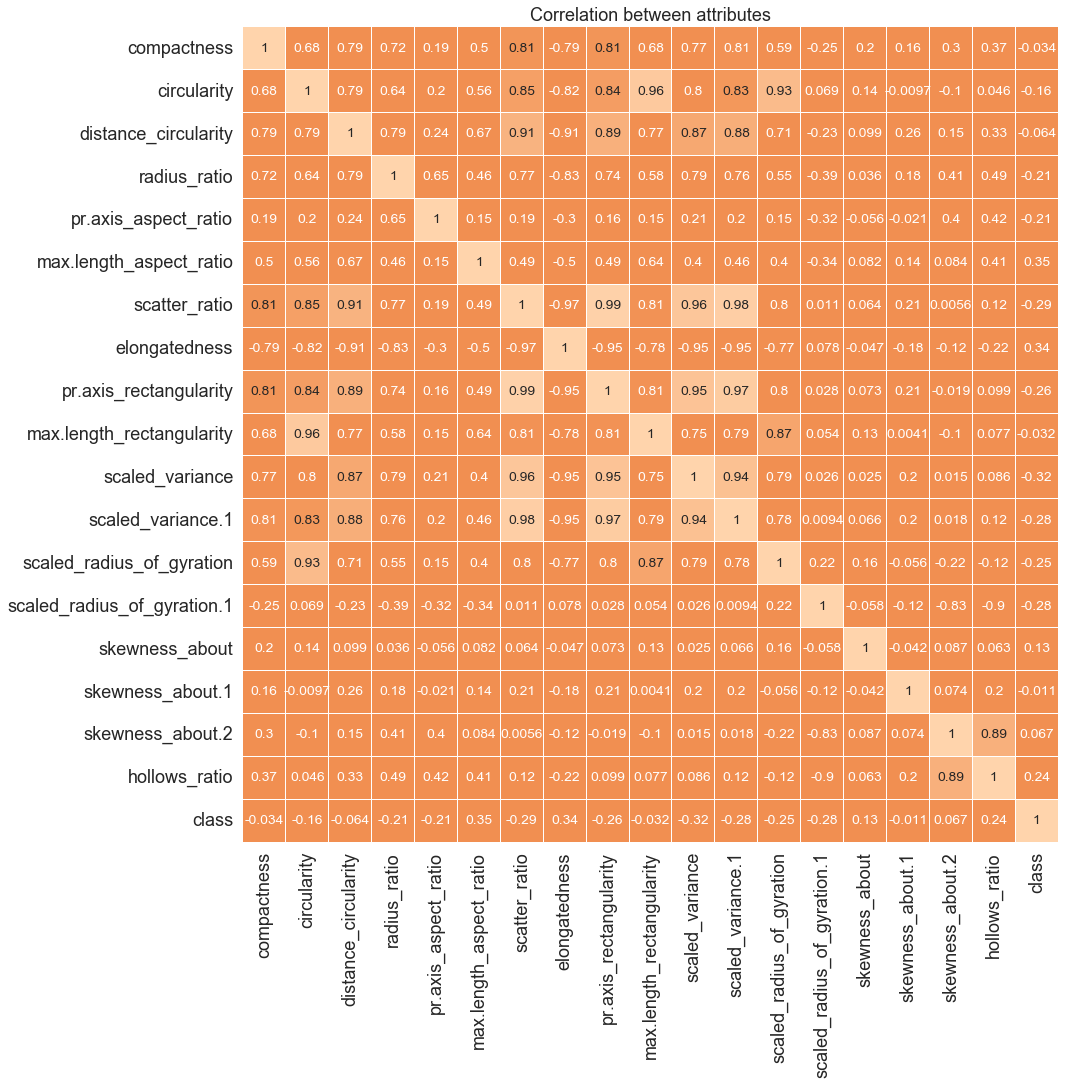

In [233]:
# correlation plot---heatmap
sns.set(font_scale=1.15)
fig,ax=plt.subplots(figsize=(18,15))
sns.heatmap(cor,vmin=0.8, annot=True,linewidths=0.01,center=0,linecolor="white",cbar=False,square=True)
plt.title('Correlation between attributes',fontsize=18)
ax.tick_params(labelsize=18)

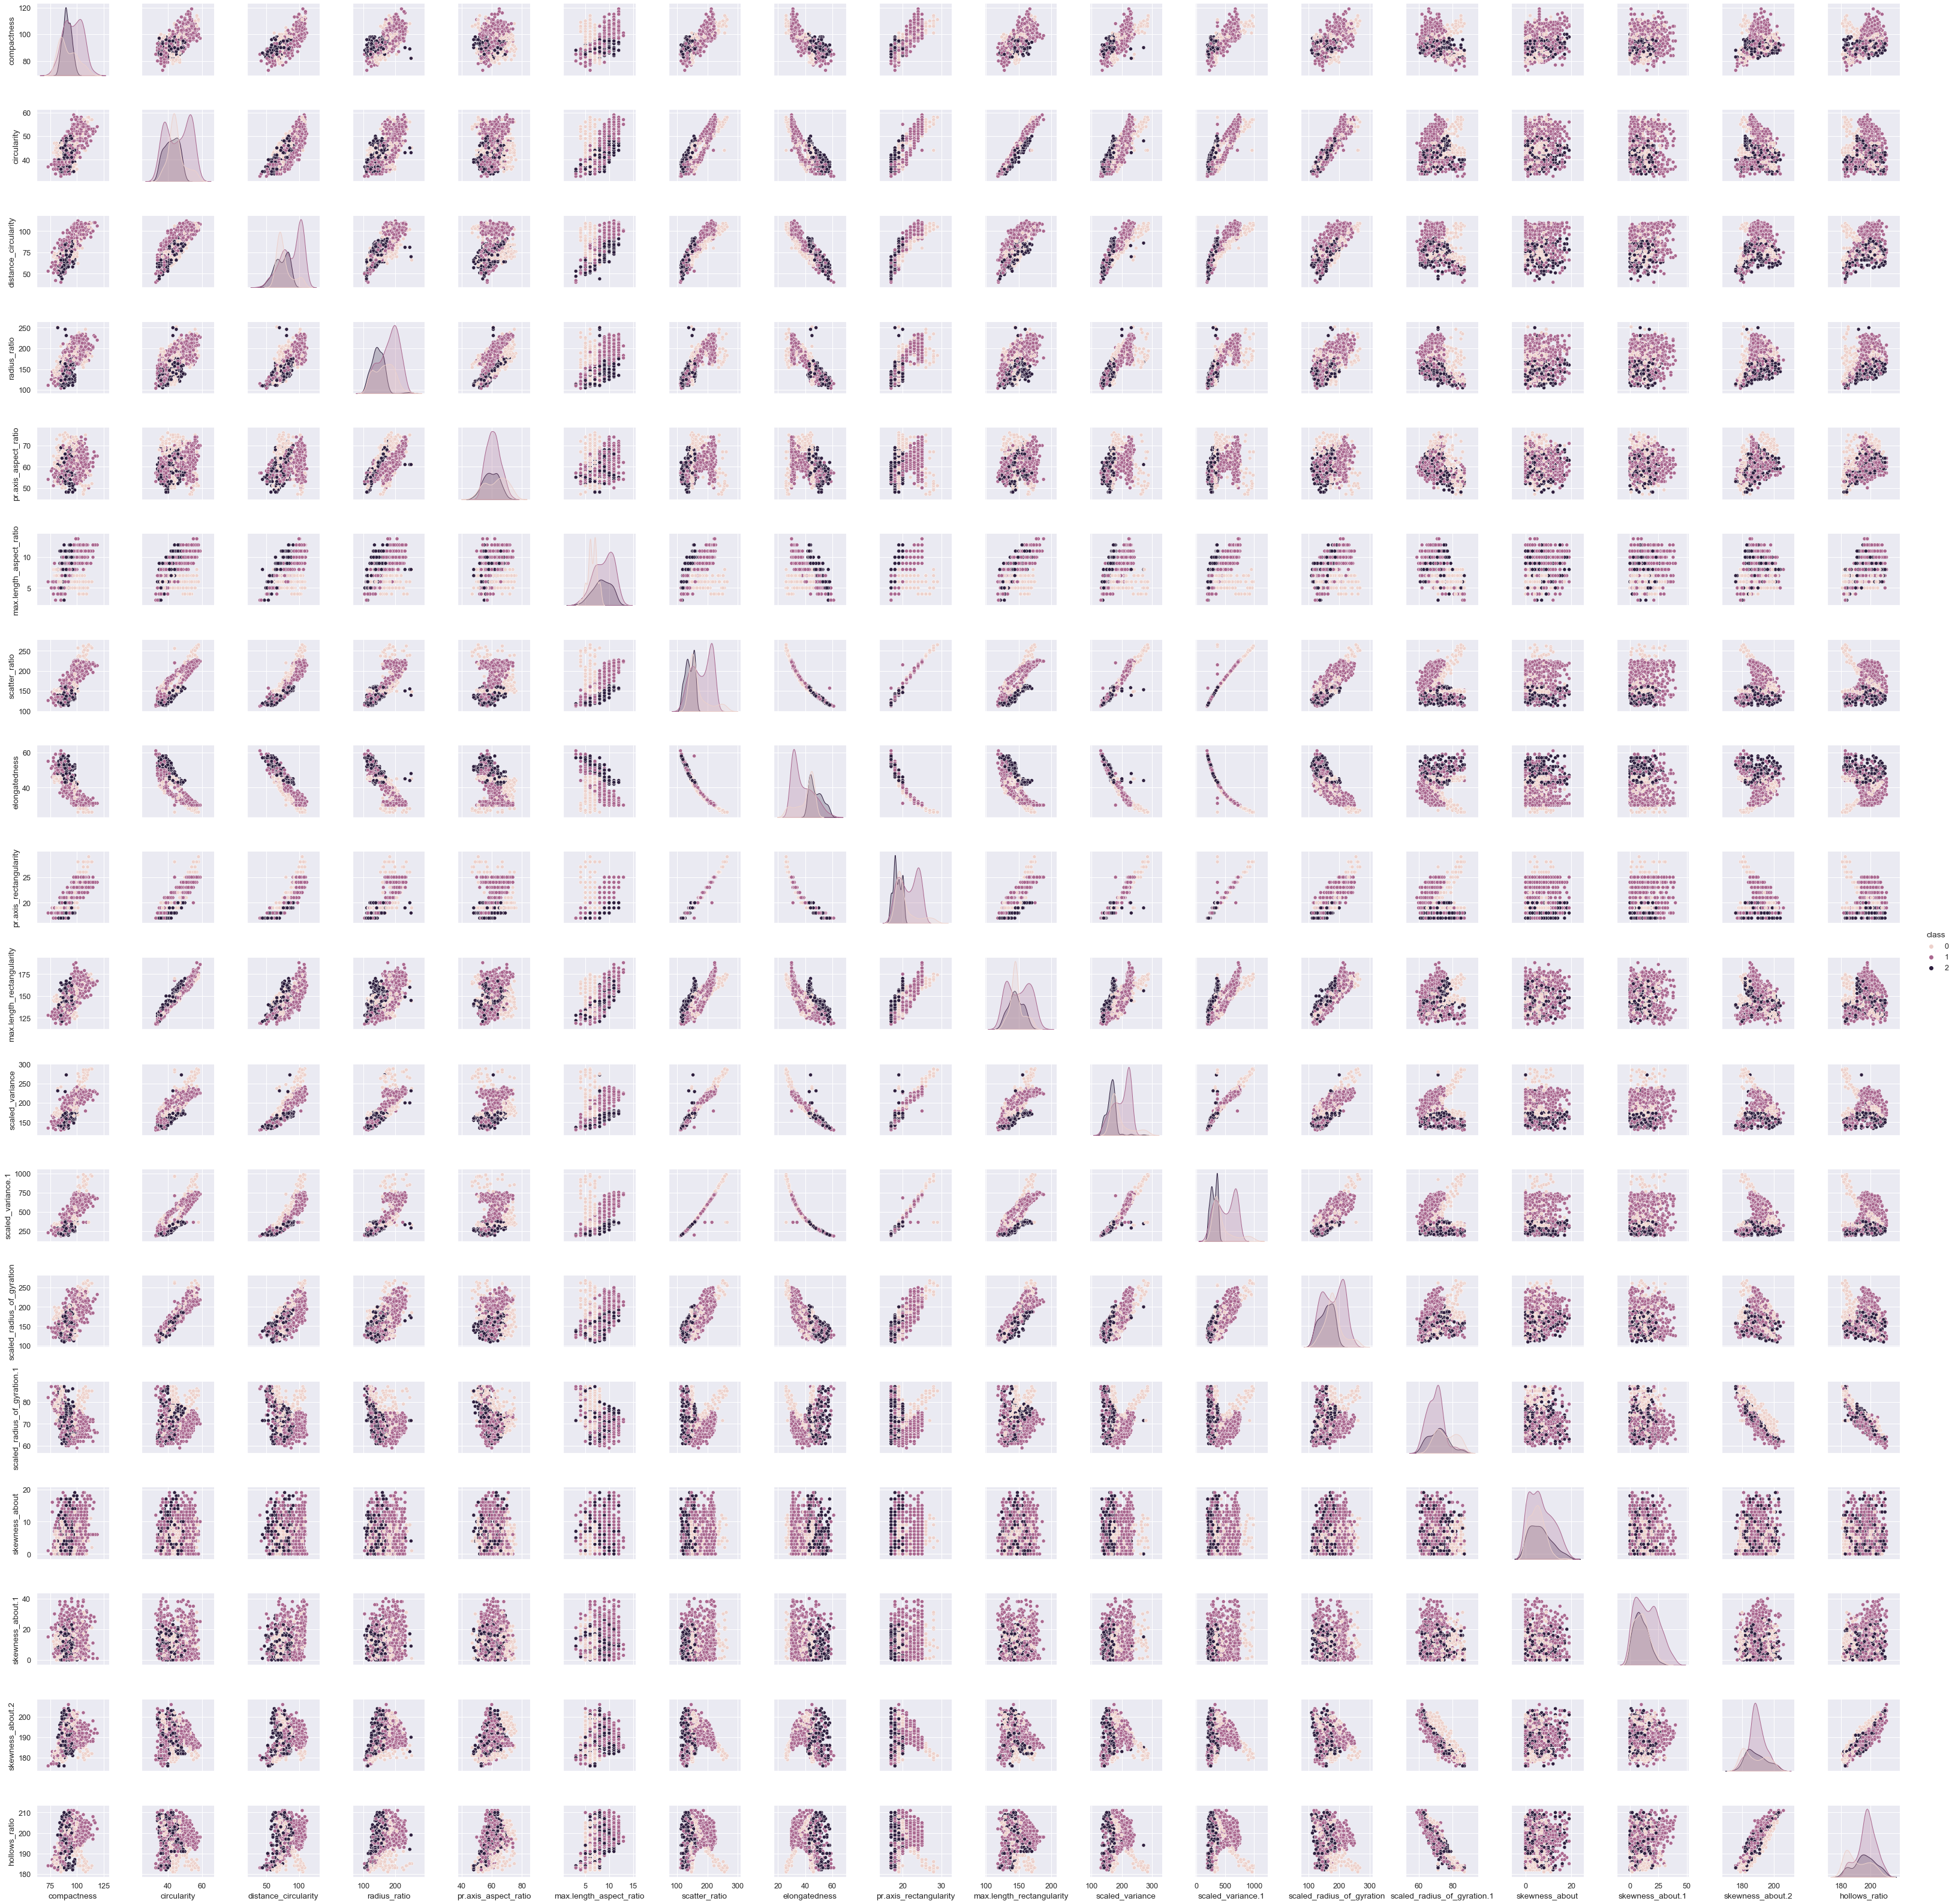

In [234]:
#pair panel
sns.pairplot(vehicle_df,hue='class');

1.C. Visualize a Pie-chart and print percentage of values for variable ‘class’

In [235]:
vehicle_df['class'].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

In [236]:
per_class=vehicle_df['class'].value_counts() * 100 / len(vehicle_df['class'])

In [237]:
per_class

1    50.709220
0    25.768322
2    23.522459
Name: class, dtype: float64

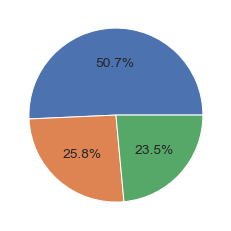

In [238]:
plt.pie(per_class, autopct='%1.1f%%');

1.D. Check for duplicate rows in the data and impute with correct approach.

In [239]:
vehicle_df.duplicated().sum()

0

# 2. Data Preparation:

2.A. Split data into X and Y. [Train and Test optional] 

In [240]:
#independent and dependent variables
X=vehicle_df.iloc[:,0:18]
y = vehicle_df.iloc[:,18]

In [241]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

In [242]:
model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

C:\Users\HARITHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [243]:
# check the accuracy on the training data
print('Accuracy on Training data: ',model.score(X_train, y_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ',model.score(X_test , y_test))
#Calculate the recall value 
print('Recall value: ',metrics.recall_score(y_test, prediction, average='macro'))
#Calculate the precision value 
print('Precision value: ',metrics.precision_score(y_test, prediction, average='macro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
print("Classification Report:\n",metrics.classification_report(prediction,y_test))

Accuracy on Training data:  0.9003378378378378
Accuracy on Testing data:  0.8858267716535433
Recall value:  0.881797636393071
Precision value:  0.8811525423728813
Confusion Matrix:
 [[ 63   5   2]
 [  7 112   6]
 [  1   8  50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89        70
           1       0.90      0.90      0.90       125
           2       0.86      0.85      0.85        59

    accuracy                           0.89       254
   macro avg       0.88      0.88      0.88       254
weighted avg       0.89      0.89      0.89       254



- The accuracy, recall, and precision values using Logistic Regression model is high without applying dimentionality reduction (PCA).

In [244]:
resultsDf=pd.DataFrame({'Model':['Logistic'],'Accuracy': model.score(X_test , y_test)},index={'1'})
resultsDf=resultsDf[['Model','Accuracy']]
resultsDf

Model  Accuracy
1  Logistic  0.885827

In [245]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [246]:
# check the accuracy on the training data
print('Accuracy on Training data: ',model.score(X_train, y_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ', model.score(X_test , y_test))
#Calculate the recall value 
print('Recall value: ',metrics.recall_score(y_test, prediction, average='macro'))
#Calculate the precision value 
print('Precision value: ',metrics.precision_score(y_test, prediction, average='macro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
print("Classification Report:\n",metrics.classification_report(prediction,y_test))

Accuracy on Training data:  0.6266891891891891
Accuracy on Testing data:  0.594488188976378
Recall value:  0.608675408774486
Precision value:  0.7405060217560218
Confusion Matrix:
 [[15  0  0]
 [16 79  1]
 [40 46 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.21      1.00      0.35        15
           1       0.63      0.82      0.71        96
           2       0.98      0.40      0.57       143

    accuracy                           0.59       254
   macro avg       0.61      0.74      0.54       254
weighted avg       0.80      0.59      0.61       254



In [247]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['Naive Bayes'], 'Accuracy': model.score(X_test, y_test)},index={'2'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','Accuracy']]
resultsDf

Model  Accuracy
1     Logistic  0.885827
2  Naive Bayes  0.594488

In [248]:
clf = SVC()
clf.fit(X_train, y_train)
prediction = model.predict(X_test)

3.B. Print Classification metrics for train data. 

In [249]:
# check the accuracy on the training data
print('Accuracy on Training data: ',model.score(X_train, y_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ', model.score(X_test , y_test))
#Calculate the recall value 
print('Recall value: ',metrics.recall_score(y_test, prediction, average='macro'))
#Calculate the precision value 
print('Precision value: ',metrics.precision_score(y_test, prediction, average='macro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
print("Classification Report:\n",metrics.classification_report(prediction,y_test))

Accuracy on Training data:  0.6266891891891891
Accuracy on Testing data:  0.594488188976378
Recall value:  0.608675408774486
Precision value:  0.7405060217560218
Confusion Matrix:
 [[15  0  0]
 [16 79  1]
 [40 46 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.21      1.00      0.35        15
           1       0.63      0.82      0.71        96
           2       0.98      0.40      0.57       143

    accuracy                           0.59       254
   macro avg       0.61      0.74      0.54       254
weighted avg       0.80      0.59      0.61       254



In [250]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['SVM'], 'Accuracy': model.score(X_test, y_test)},index={'3'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','Accuracy']]
resultsDf

Model  Accuracy
1     Logistic  0.885827
2  Naive Bayes  0.594488
3          SVM  0.594488

3.C. Apply PCA on the data with 10 components.

In [251]:
# Scaling the independent attributes using zscore
X_z=X.apply(zscore)

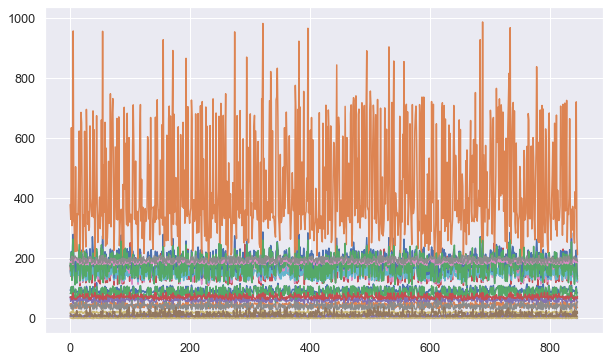

In [252]:
# prior to scaling
plt.rcParams['figure.figsize']=(10,6)
plt.plot(vehicle_df)
plt.show()

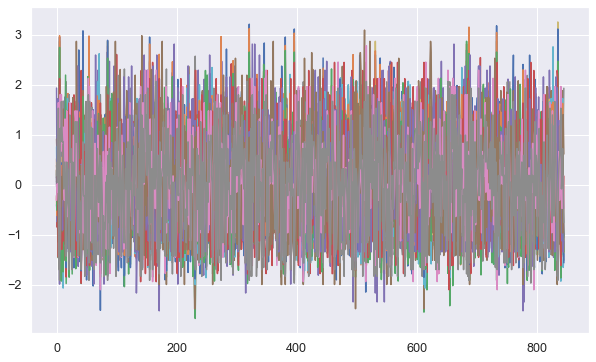

In [253]:
#plt.plot(X_z,figsize=(20,10))
plt.rcParams['figure.figsize']=(10,6)
plt.plot(X_z)
plt.show()

In [254]:
# Calculating the covariance between attributes after scaling
cov_matrix = np.cov(X_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.72277977  0.1930925   0.50051942
   0.81358214 -0.78968322  0.81465658  0.67694334  0.77078163  0.80712401
   0.58593517 -0.24697246  0.19754181  0.1565327   0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.63903532  0.20349327  0.5611334
   0.8489411  -0.82244387  0.84439802  0.96245572  0.80371846  0.82844154
   0.92691166  0.06882659  0.13651201 -0.00967793 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.79516215  0.24462154  0.66759792
   0.90614687 -0.9123854   0.89408198  0.77544391  0.87061349  0.88498924
   0.70660663 -0.22962442  0.09922417  0.26265581  0.14627113  0.33312625]
 [ 0.72277977  0.63903532  0.79516215  1.00118343  0.65132393  0.46450748
   0.77085211 -0.82636872  0.74502008  0.58015378  0.78711387  0.76115704
   0.55142559 -0.39092105  0.03579728  0.17981316  0.40632957  0.49234013]
 [ 0.1930925   0.20349327  0.24462154  0.65132393  1.00118343  0.15047265
   0.19442484

In [255]:
#Finding eigenvalues amd eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-2.72502890e-01 -8.70435783e-02  3.81852075e-02  1.38675013e-01
  -1.37101466e-01  2.63611383e-01  2.02717114e-01 -7.58796410e-01
   3.66685918e-01  1.60045219e-01  8.40252779e-02  2.14645175e-02
  -1.87350749e-02  6.89082276e-02  4.26105276e-02  9.97784975e-02
  -8.22590084e-02 -3.30366937e-02]
 [-2.87254690e-01  1.31621757e-01  2.01146908e-01 -3.80554832e-02
   1.38995553e-01 -7.13474241e-02 -3.92275358e-01 -6.76034223e-02
   5.53261885e-02 -1.82323962e-01 -3.65229874e-02  1.47247511e-01
  -4.89102355e-02  5.90534770e-02 -6.74107885e-01  1.63466948e-01
  -2.59100771e-01  2.48832011e-01]
 [-3.02421105e-01 -4.61430061e-02 -6.34621085e-02  1.08954287e-01
   8.00174278e-02 -1.69006151e-02  1.63371282e-01  2.77371950e-01
   7.46784853e-02  2.73033778e-01  4.68505530e-01  6.52730855e-01
   4.74162132e-03 -1.62108150e-01 -4.99754439e-04 -6.36582307e-02
   1.20629778e-01  9.80561531e-02]
 [-2.69713545e-01 -1.97931263e-01 -5.62851689e-02 -2.54355087e-01
  -1.33744367e-01 -

In [256]:
# Make a set of (eigenvalue, eigenvector) pairs
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:]

[(9.749402689379597,
  array([-0.27250289, -0.28725469, -0.30242111, -0.26971354, -0.09786073,
         -0.19520014, -0.31052393,  0.3090069 , -0.307287  , -0.27815416,
         -0.29976509, -0.30553237, -0.26323762,  0.04193594, -0.03608321,
         -0.05872048, -0.03801314, -0.08474   ])),
 (3.3507191194129806,
  array([-0.08704358,  0.13162176, -0.04614301, -0.19793126, -0.25783995,
         -0.10804563,  0.07528535, -0.01322994,  0.0875602 ,  0.12215424,
          0.07726575,  0.07150302,  0.21058205,  0.50362158, -0.01576632,
         -0.09274624, -0.50162122, -0.50761211])),
 (1.1923815452731596,
  array([ 0.03818521,  0.20114691, -0.06346211, -0.05628517,  0.06199275,
          0.14895782, -0.10904283,  0.09085269, -0.1060705 ,  0.21368469,
         -0.1445998 , -0.11034374,  0.20287019, -0.07386402,  0.55917399,
         -0.6706805 ,  0.06224071,  0.04170535])),
 (1.1338191632147836,
  array([ 0.13867501, -0.03805548,  0.10895429, -0.25435509, -0.61276572,
          0.27867816

In [257]:
# print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigenvalues)

Eigenvalues in descending order: 
[9.74940269e+00 3.35071912e+00 1.19238155e+00 1.13381916e+00
 8.83997312e-01 6.66265745e-01 3.18150910e-01 2.28179142e-01
 1.31018595e-01 7.98619108e-02 7.33979478e-02 6.46162669e-02
 5.16287320e-03 4.01448646e-02 1.98136761e-02 2.27005257e-02
 3.22758478e-02 2.93936408e-02]


Cumulative Variance Explained [ 54.0993254   72.69242795  79.30893968  85.60048941  90.50578051
  94.2028816   95.96829741  97.23446089  97.96148159  98.40463444
  98.81191882  99.17047375  99.39323715  99.57233547  99.73544045
  99.86140541  99.97135127 100.        ]


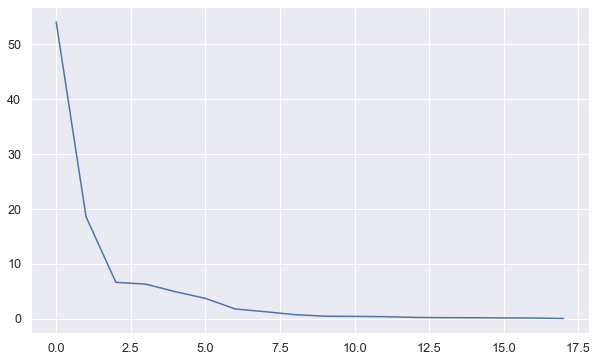

In [258]:
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
plt.plot(var_exp)

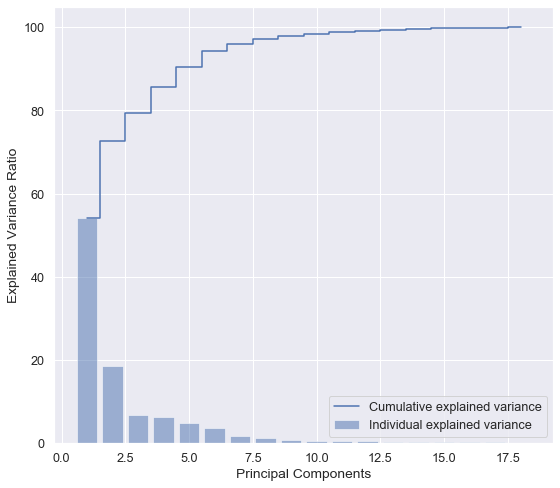

In [259]:
# Ploting 
plt.figure(figsize=(8 , 7))
plt.bar(range(1, eigenvalues.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenvalues.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [260]:
# Reducing from 17 to 10 dimension space
pca = PCA(n_components=10)
data_reduced = pca.fit_transform(X_z)
data_reduced.transpose()

array([[ 0.58422804, -1.5121798 ,  3.91344816, ...,  5.12009307,
        -3.29709502, -4.96759448],
       [-0.67567325, -0.34893367,  0.2345073 , ..., -0.18227007,
        -1.10194286,  0.42274968],
       [-0.45333356, -0.33343619, -1.26509352, ..., -0.50836783,
         1.93384417,  1.30871531],
       ...,
       [-0.68196902,  0.10442512,  0.17305277, ..., -0.38820845,
         0.45880709, -0.21433678],
       [ 0.31266966, -0.29625823,  0.19108534, ..., -0.07735512,
         0.82142229,  0.59676772],
       [ 0.14411602, -0.39097765, -0.52948668, ...,  0.55527162,
        -0.34059305,  0.10856429]])

In [261]:
pca.components_

array([[ 0.27250289,  0.28725469,  0.30242111,  0.26971354,  0.09786073,
         0.19520014,  0.31052393, -0.3090069 ,  0.307287  ,  0.27815416,
         0.29976509,  0.30553237,  0.26323762, -0.04193594,  0.03608321,
         0.05872048,  0.03801314,  0.08474   ],
       [-0.08704358,  0.13162176, -0.04614301, -0.19793126, -0.25783995,
        -0.10804563,  0.07528535, -0.01322994,  0.0875602 ,  0.12215424,
         0.07726575,  0.07150302,  0.21058205,  0.50362158, -0.01576632,
        -0.09274624, -0.50162122, -0.50761211],
       [-0.03818521, -0.20114691,  0.06346211,  0.05628517, -0.06199275,
        -0.14895782,  0.10904283, -0.09085269,  0.1060705 , -0.21368469,
         0.1445998 ,  0.11034374, -0.20287019,  0.07386402, -0.55917399,
         0.6706805 , -0.06224071, -0.04170535],
       [ 0.13867501, -0.03805548,  0.10895429, -0.25435509, -0.61276572,
         0.27867816,  0.00539295,  0.06521486,  0.03089915,  0.04146747,
        -0.06400509, -0.00219687, -0.08553965, -0.115

In [262]:
X_comp = pd.DataFrame(pca.components_,columns=list(X_z))
X_comp.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.272503     0.287255              0.302421      0.269714   
1    -0.087044     0.131622             -0.046143     -0.197931   
2    -0.038185    -0.201147              0.063462      0.056285   
3     0.138675    -0.038055              0.108954     -0.254355   
4     0.137101    -0.138996             -0.080017      0.133744   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.097861                 0.195200       0.310524   
1             -0.257840                -0.108046       0.075285   
2             -0.061993                -0.148958       0.109043   
3             -0.612766                 0.278678       0.005393   
4              0.123601                -0.634893       0.085557   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0      -0.309007                0.307287                   0.278154   
1      -0.013230                0.087560                   0.122154   
2      -0.090853                0.106070                  -0.213685   
3       0.065215                0.030899                   0.041467   
4      -0.079073                0.081646                  -0.251113   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         0.299765           0.305532                   0.263238   
1         0.077266           0.071503                   0.210582   
2         0.144600           0.110344                  -0.202870   
3        -0.064005          -0.002197                  -0.085540   
4         0.147471           0.110101                  -0.005212   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.041936        0.036083          0.058720   
1                     0.503622       -0.015766         -0.092746   
2                     0.073864       -0.559174          0.670680   
3                    -0.115400        0.473703          0.428426   
4                     0.138069        0.566552          0.130870   

   skewness_about.2  hollows_ratio  
0          0.038013       0.084740  
1         -0.501621      -0.507612  
2         -0.062241      -0.041705  
3         -0.027410       0.096037  
4          0.180519      -0.110788

In [263]:
# P_reduce represents reduced mathematical space.
# Reducing from 17 to 10 dimension space
P_reduce = np.array(eigenvectors[0:10])   
# projecting original data into principal component dimensions
X_std_10D = np.dot(X_z,P_reduce.T)   
# converting array to dataframe for pairplot
Proj_data_df = pd.DataFrame(X_std_10D)  

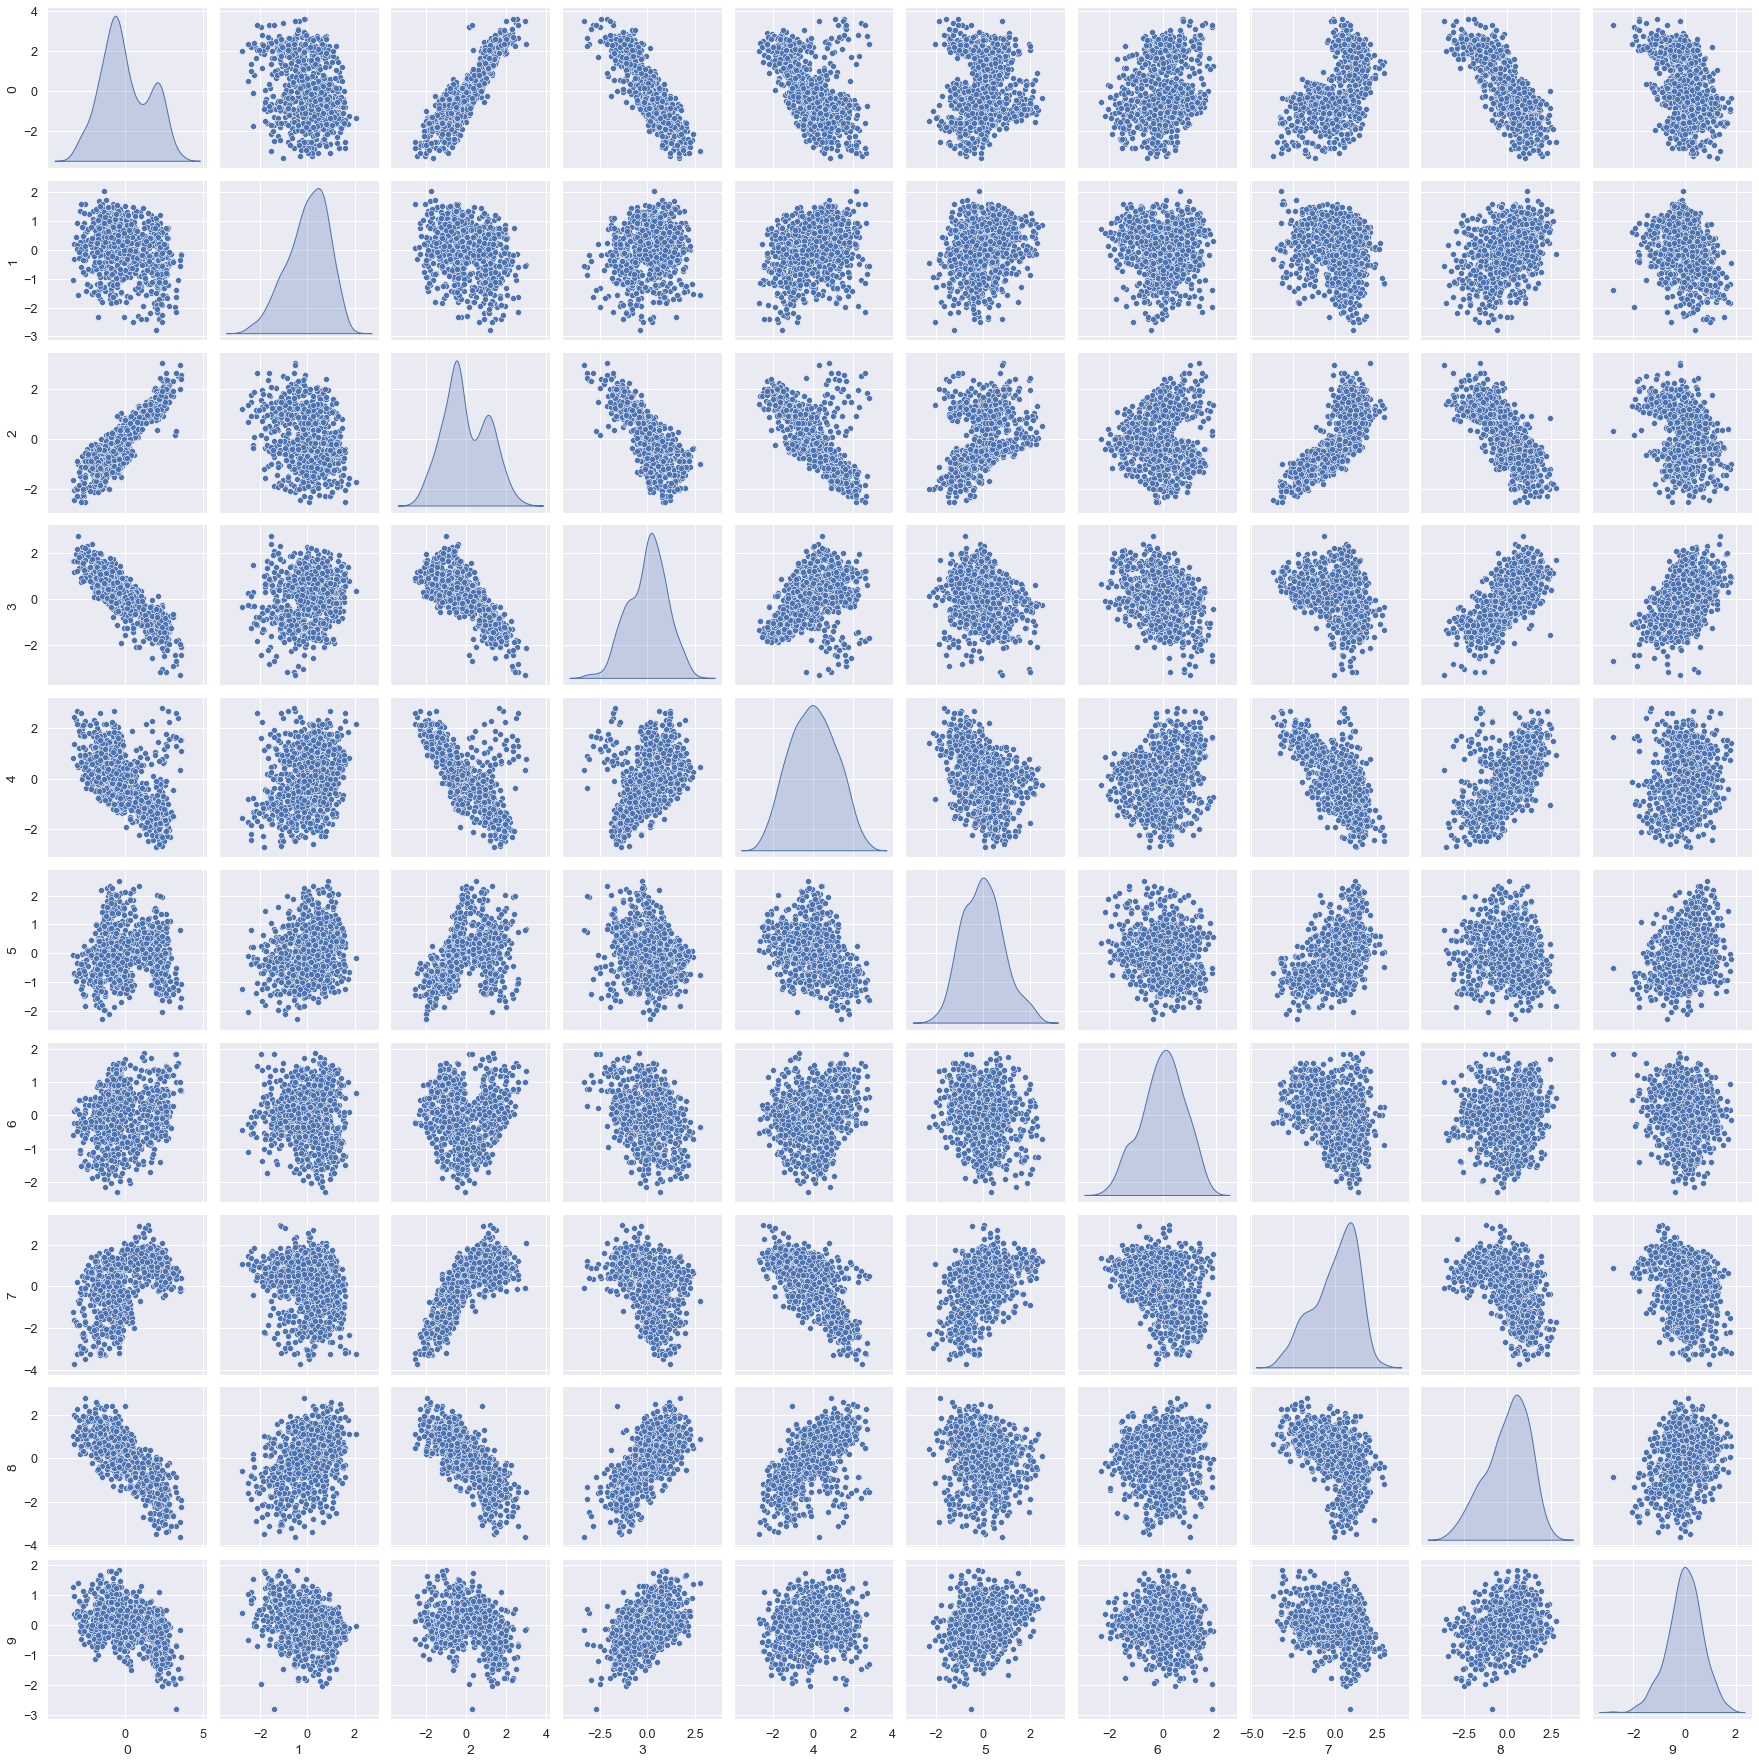

In [264]:
#Let us check it visually
sns.pairplot(Proj_data_df, diag_kind='kde');

- Now, there are almost no correlation between independent attributes but there are some attributes which shows some correlation.
- The reason behind this is that some attributes in data are less correlated but we still taken that for dimentionality reduction.
- The solution may be we can remove columns which are less correlated then apply PCA.


In [265]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(Proj_data_df,y, test_size = 0.3, random_state = 10)

# Logistic Regression

In [266]:
model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [267]:
# check the accuracy on the training data
print('Accuracy on Training data: ',model.score(X_train, y_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ',model.score(X_test , y_test))
#Calculate the recall value 
print('Recall value: ',metrics.recall_score(y_test, prediction, average='macro'))
#Calculate the precision value 
print('Precision value: ',metrics.precision_score(y_test, prediction, average='macro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
print("Classification Report:\n",metrics.classification_report(prediction,y_test))

Accuracy on Training data:  0.8614864864864865
Accuracy on Testing data:  0.8543307086614174
Recall value:  0.863621175327829
Precision value:  0.8442223075975152
Confusion Matrix:
 [[ 60   9   2]
 [  9 104   3]
 [  2  12  53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        71
           1       0.83      0.90      0.86       116
           2       0.91      0.79      0.85        67

    accuracy                           0.85       254
   macro avg       0.86      0.84      0.85       254
weighted avg       0.86      0.85      0.85       254



- The accuracy, precision and recall value is reduced after applying PCA because we have reduced the dimensions.
- Despite giving less accuracy, precision and recall, this model is better as it has taken into consideration the relationship between the independent varibales and reduced the columns which are highly correlated.
- This model is performing well compared to Naive Bayes'and Naive Bayes' k fold models.

In [268]:
resultsDf=pd.DataFrame({'Model':['Logistic'],'Accuracy': model.score(X_test , y_test)},index={'1'})
resultsDf=resultsDf[['Model','Accuracy']]
resultsDf

Model  Accuracy
1  Logistic  0.854331

# Naive Bayes' Classifier

In [269]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [270]:
# check the accuracy on the training data
print('Accuracy on Training data: ',model.score(X_train, y_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ', model.score(X_test , y_test))
#Calculate the recall value 
print('Recall value: ',metrics.recall_score(y_test, prediction, average='macro'))
#Calculate the precision value 
print('Precision value: ',metrics.precision_score(y_test, prediction, average='macro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
print("Classification Report:\n",metrics.classification_report(prediction,y_test))

Accuracy on Training data:  0.6469594594594594
Accuracy on Testing data:  0.6417322834645669
Recall value:  0.6618565646754088
Precision value:  0.7433265993265993
Confusion Matrix:
 [[30  0  0]
 [16 79  4]
 [25 46 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.42      1.00      0.59        30
           1       0.63      0.80      0.71        99
           2       0.93      0.43      0.59       125

    accuracy                           0.64       254
   macro avg       0.66      0.74      0.63       254
weighted avg       0.75      0.64      0.64       254



- This model is not performing well as compared to other models.

In [271]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['Naive Bayes'], 'Accuracy': model.score(X_test, y_test)},index={'2'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','Accuracy']]
resultsDf

Model  Accuracy
1     Logistic  0.854331
2  Naive Bayes  0.641732

# Using k fold cross validation in Naive Bayes

In [272]:
#Use the Naive Bayes CLassifier with k fold cross validation
scores = cross_val_score(model, Proj_data_df, y, cv=10)
print(scores)
print('Average score: ', np.mean(scores))

[0.63529412 0.55294118 0.6        0.64705882 0.55294118 0.75294118
 0.63095238 0.60714286 0.6547619  0.64285714]
Average score:  0.6276890756302522


In [273]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['Naive Bayes k fold'], 'Accuracy': np.mean(scores)},index={'3'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','Accuracy']]
resultsDf

Model  Accuracy
1            Logistic  0.854331
2         Naive Bayes  0.641732
3  Naive Bayes k fold  0.627689

- The model is not performing well as compared to other models.

# Support Vector Classifier

In [274]:
clf = SVC()
clf.fit(X_train, y_train)
prediction = model.predict(X_test)

In [275]:
# check the accuracy on the training data
print('Accuracy on Training data: ',model.score(X_train, y_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ', model.score(X_test , y_test))
#Calculate the recall value 
print('Recall value: ',metrics.recall_score(y_test, prediction, average='macro'))
#Calculate the precision value 
print('Precision value: ',metrics.precision_score(y_test, prediction, average='macro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
print("Classification Report:\n",metrics.classification_report(prediction,y_test))

Accuracy on Training data:  0.6469594594594594
Accuracy on Testing data:  0.6417322834645669
Recall value:  0.6618565646754088
Precision value:  0.7433265993265993
Confusion Matrix:
 [[30  0  0]
 [16 79  4]
 [25 46 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.42      1.00      0.59        30
           1       0.63      0.80      0.71        99
           2       0.93      0.43      0.59       125

    accuracy                           0.64       254
   macro avg       0.66      0.74      0.63       254
weighted avg       0.75      0.64      0.64       254



- This model is not performing well.

In [276]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['SVM'], 'Accuracy': model.score(X_test, y_test)},index={'4'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','Accuracy']]
resultsDf

Model  Accuracy
1            Logistic  0.854331
2         Naive Bayes  0.641732
3  Naive Bayes k fold  0.627689
4                 SVM  0.641732

# Using Grid Search to tune model parameters

In [292]:
#Grid search to tune model parameters for SVC
from sklearn.model_selection import GridSearchCV
model = SVC()
params = {'C': [0.01, 0.1, 0.5, 1], 'kernel': ['linear', 'rbf']}
model1 = GridSearchCV(model, param_grid=params, verbose=5)
model1.fit(X_train, y_train)
print("Best Hyper Parameters:\n", model1.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.941 total time=   0.2s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.874 total time=   0.0s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.907 total time=   0.0s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.983 total time=   0.0s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.932 total time=   0.0s
[CV 1/5] END ................C=0.01, kernel=rbf;, score=0.513 total time=   0.0s
[CV 2/5] END ................C=0.01, kernel=rbf;, score=0.513 total time=   0.0s
[CV 3/5] END ................C=0.01, kernel=rbf;, score=0.517 total time=   0.0s
[CV 4/5] END ................C=0.01, kernel=rbf;, score=0.517 total time=   0.0s
[CV 5/5] END ................C=0.01, kernel=rbf;, score=0.508 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.950 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;,

In [294]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",model1.best_estimator_)
print("\n The best score across ALL searched params:\n",model1.best_score_)
print("\n The best parameters across ALL searched params:\n",model1.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 SVC(C=0.1, kernel='linear')

 The best score across ALL searched params:
 0.9375587523144852

 The best parameters across ALL searched params:
 {'C': 0.1, 'kernel': 'linear'}


B. Share best Parameters observed from above step.

- The best estimator across ALL searched params:
 SVC(C=0.1, kernel='linear')

- The best score across ALL searched params:
 0.9375587523144852

- The best parameters across ALL searched params:
 {'C': 0.1, 'kernel': 'linear'}

In [278]:
#Build the model with the best hyper parameters
model = SVC(C=0.5, kernel="linear")
scores = cross_val_score(model, Proj_data_df, y, cv=10)
print(scores)
print(np.mean(scores))

[0.81176471 0.8        0.85882353 0.85882353 0.87058824 0.84705882
 0.85714286 0.9047619  0.88095238 0.88095238]
0.8570868347338936


In [279]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['SVM k fold'], 'Accuracy': np.mean(scores)},index={'5'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','Accuracy']]
resultsDf

Model  Accuracy
1            Logistic  0.854331
2         Naive Bayes  0.641732
3  Naive Bayes k fold  0.627689
4                 SVM  0.641732
5          SVM k fold  0.857087

- We can see that Logistic Regression and SVM k fold is given better results as compared to other models so we can use either of the two models to predict the silhouette as one of three types of vehicle.

In [280]:
#splitting the data in test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

In [281]:
# scaling the data using the standard scaler
from sklearn.preprocessing import StandardScaler
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

In [282]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train_sd.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00169205  0.69510999  0.79093174  0.72835184  0.21888501  0.51630765
   0.81466568 -0.79249053  0.81562662  0.69493762  0.76965639  0.8079382
   0.6018784  -0.23292845  0.1777701   0.16129088  0.29107259  0.36229106]
 [ 0.69510999  1.00169205  0.80101871  0.66245848  0.23982668  0.55826096
   0.85124238 -0.82911962  0.84353731  0.96223666  0.80730936  0.83188956
   0.92490531  0.06127477  0.12423951  0.0144264  -0.08843129  0.06521593]
 [ 0.79093174  0.80101871  1.00169205  0.7978868   0.26287468  0.6778587
   0.90364003 -0.91115044  0.89344273  0.79364077  0.86732697  0.88272575
   0.72188889 -0.20989583  0.09286116  0.26881961  0.13214005  0.3236881 ]
 [ 0.72835184  0.66245848  0.7978868   1.00169205  0.66543332  0.48358479
   0.77875874 -0.8336149   0.75508573  0.61730125  0.78571466  0.76638865
   0.57420016 -0.37127434  0.02851743  0.18594076  0.39856553  0.4918137 ]
 [ 0.21888501  0.23982668  0.26287468  0.66543332  1.00169205  0.18653387
   0.21959938 

In [283]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 54.49961499  73.05213179  79.50436917  85.71061975  90.50838226
  94.19554002  95.97351     97.23967198  97.91471205  98.36521716
  98.76604529  99.13374931  99.36698071  99.55864159  99.71976602
  99.85104172  99.96833274 100.        ]


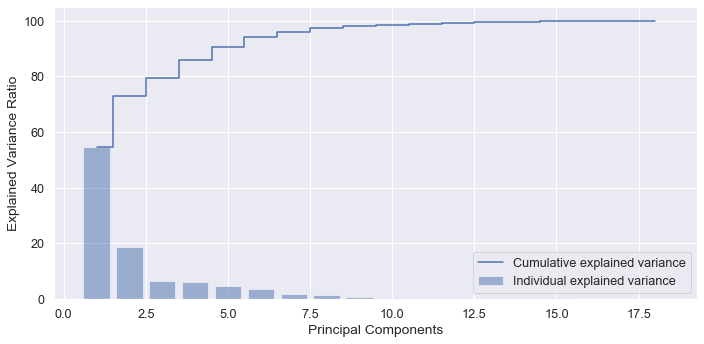

In [284]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [285]:
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:5]

[(9.826529564948988,
  array([ 0.27208088,  0.28733218,  0.30109701,  0.27174064,  0.106743  ,
          0.19594814,  0.30908083, -0.3080185 ,  0.30582626,  0.281041  ,
          0.29781357,  0.3042061 ,  0.26497   , -0.03777504,  0.03225188,
          0.06242622,  0.03614795,  0.08417701])),
 (3.34510353659071,
  array([ 0.08347756, -0.11656878,  0.03992451,  0.19163065,  0.26397268,
          0.1255669 , -0.08104313,  0.01758729, -0.09102304, -0.10415006,
         -0.0866686 , -0.08069559, -0.20051246, -0.50674711,  0.00649213,
          0.07164994,  0.50300014,  0.51035525])),
 (1.1633678770584706,
  array([ 0.01422964,  0.20001061, -0.08691502, -0.00326151,  0.17259398,
          0.03157892, -0.09416684,  0.06623605, -0.09921644,  0.18647621,
         -0.11385795, -0.09088903,  0.22164768, -0.03023257,  0.44892664,
         -0.76503878,  0.07335241,  0.0102197 ])),
 (1.11901533405019,
  array([ 0.14386127, -0.00461042,  0.09781144, -0.23618643, -0.5476076 ,
          0.27823449, -0

In [286]:
# generating dimensionally reduced datasets
w = np.hstack((eigen_pairs[0][1].reshape(-1,1), eigen_pairs[1][1].reshape(-1,1)))
print('Matrix W:\n', w)
X_sd_pca = X_train_sd.dot(w)
X_test_sd_pca = X_test_sd.dot(w)

Matrix W:
 [[ 0.27208088  0.08347756]
 [ 0.28733218 -0.11656878]
 [ 0.30109701  0.03992451]
 [ 0.27174064  0.19163065]
 [ 0.106743    0.26397268]
 [ 0.19594814  0.1255669 ]
 [ 0.30908083 -0.08104313]
 [-0.3080185   0.01758729]
 [ 0.30582626 -0.09102304]
 [ 0.281041   -0.10415006]
 [ 0.29781357 -0.0866686 ]
 [ 0.3042061  -0.08069559]
 [ 0.26497    -0.20051246]
 [-0.03777504 -0.50674711]
 [ 0.03225188  0.00649213]
 [ 0.06242622  0.07164994]
 [ 0.03614795  0.50300014]
 [ 0.08417701  0.51035525]]


In [287]:
X_train_sd.shape, w.shape, X_sd_pca.shape, X_test_sd_pca.shape

((592, 18), (18, 2), (592, 2), (254, 2))

In [288]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train_sd, y_train)
print ('Before PCA score', clf.score(X_test_sd, y_test))

clf.fit(X_sd_pca, y_train)
print ('After PCA score', clf.score(X_test_sd_pca, y_test))

Before PCA score 0.9566929133858267
After PCA score 0.6181102362204725


In [289]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_sd, y_train)
print ('Before PCA score', model.score(X_test_sd, y_test))

model.fit(X_sd_pca, y_train)
print ('After PCA score', model.score(X_test_sd_pca, y_test))

Before PCA score 0.9488188976377953
After PCA score 0.5551181102362205


In [290]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train_sd, y_train)
print ('Before PCA score', model.score(X_test_sd, y_test))

model.fit(X_sd_pca, y_train)
print ('After PCA score', model.score(X_test_sd_pca, y_test))

Before PCA score 0.5984251968503937
After PCA score 0.531496062992126


# 5. Data Understanding & Cleaning: 

5.A. Explain pre-requisite/assumptions of PCA. 

 - There must be linearity in the data set, i.e. the variables combine in a linear manner to form the dataset. The variables exhibit relationships among themselves.
 - PCA assumes that the principal component with high variance must be paid attention and the PCs with lower variance are disregarded as noise. Pearson correlation coefficient framework led to the origin of PCA, and there it was assumed first that the axes with high variance would only be turned into principal components.

5.B. Explain advantages and limitations of PCA.

Advantages of PCA: 

- Highlight similarities and differences in data
- Reduce dimensions without much information loss
- Reduces Overfitting
- Improves visualization

limitations of PCA:

- PCA is not robust against outliers: Similar to the point above, the algorithm will be biased in datasets with strong outliers. This is why it is recommended to remove outliers before performing PCA.
- PCA assumes a correlation between features: If the features (or dimensions or columns, in tabular data) are not correlated, PCA will be unable to determine principal components.